# Your Mission:
### Predict atmospheric CO2 levels at the Mauna Loa climate observatory (using only numpy)

You are encouraged to refer to the [numpy manual](https://docs.scipy.org/doc/numpy/reference/).

## Your Data:

Text(0, 0.5, 'CO2 Concentration (PPM)')

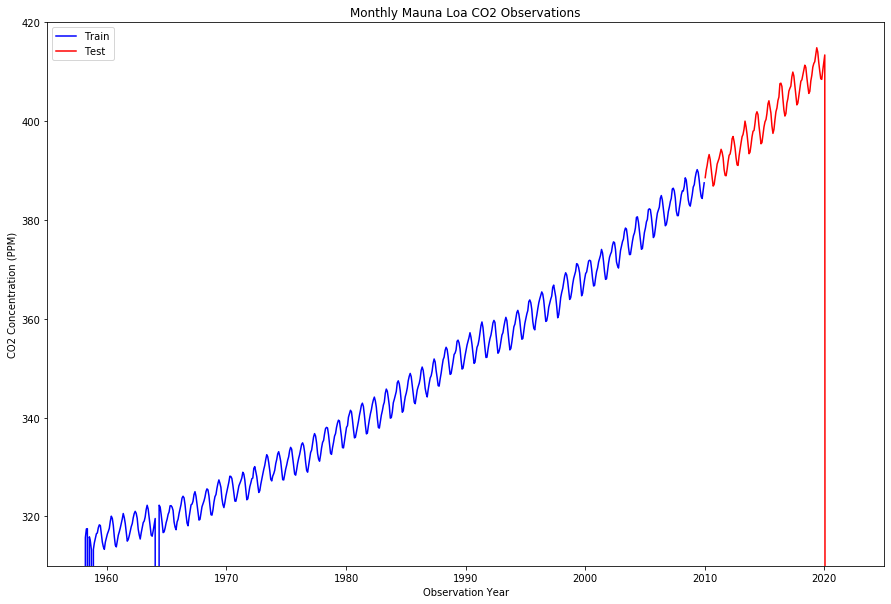

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('monthly_in_situ_co2_mlo.csv')
dates = data.Year_Date.values
co2 = data.CO2.values

train = dates < 2010
test = dates >= 2010

trainDates, trainCo2 = dates[train], co2[train]
testDates, testCo2 = dates[test], co2[test]


plt.figure(figsize=(15,10))
plt.xlim(1955, 2025)
plt.ylim(310, 420)
plt.plot(trainDates, trainCo2, label='Train', color='blue')
plt.plot(testDates, testCo2, label='Test', color='red')
plt.legend()
plt.title('Monthly Mauna Loa CO2 Observations')
plt.xlabel('Observation Year')
plt.ylabel('CO2 Concentration (PPM)')

## Your Solution:

In [2]:
trainDates # 1D numpy array (input)
trainCo2 # 1D numpy array (output)


array([-99.99, -99.99, 315.7 , 317.45, 317.51, -99.99, 315.86, 314.93,
       313.21, -99.99, 313.33, 314.67, 315.58, 316.49, 316.65, 317.72,
       318.29, 318.15, 316.54, 314.8 , 313.84, 313.33, 314.81, 315.58,
       316.43, 316.98, 317.58, 319.03, 320.04, 319.59, 318.18, 315.9 ,
       314.17, 313.83, 315.  , 316.19, 316.89, 317.7 , 318.54, 319.48,
       320.58, 319.77, 318.57, 316.79, 314.99, 315.31, 316.1 , 317.01,
       317.94, 318.55, 319.68, 320.57, 321.02, 320.62, 319.61, 317.4 ,
       316.25, 315.42, 316.69, 317.7 , 318.74, 319.07, 319.86, 321.38,
       322.25, 321.48, 319.74, 317.77, 316.21, 315.99, 317.07, 318.35,
       319.57, -99.99, -99.99, -99.99, 322.26, 321.89, 320.44, 318.69,
       316.71, 316.87, 317.68, 318.71, 319.44, 320.44, 320.89, 322.14,
       322.17, 321.87, 321.21, 318.87, 317.82, 317.3 , 318.87, 319.42,
       320.62, 321.6 , 322.39, 323.7 , 324.08, 323.75, 322.38, 320.36,
       318.64, 318.1 , 319.78, 321.03, 322.33, 322.5 , 323.04, 324.42,
      

In [321]:
data = pd.DataFrame({'date': trainDates, 'co2': trainCo2})
data['year'] = np.floor(data['date']).astype(int)
data['month'] = data.groupby('year')['year'].rank(method='first').astype(int)

## Filter outliers

In [322]:
data = data[data['co2'] > 0]

## Yearly Trend

In [323]:
from sklearn.linear_model import LinearRegression

In [324]:
yearly_trend = data.groupby('year')['co2'].mean().rename('yearly_co2').reset_index()

In [325]:
yearly_model = LinearRegression()

In [326]:
yearly_model.fit(
    X=yearly_trend[['year']],
    y=yearly_trend['yearly_co2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

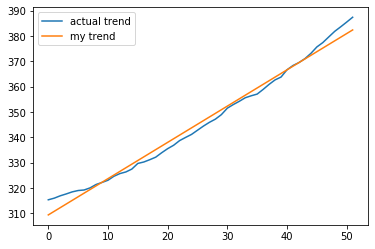

In [327]:
plt.plot(yearly_trend['yearly_co2'], label='actual trend')
plt.plot(yearly_model.predict(yearly_trend[['year']]), label='my trend')
plt.legend()

In [328]:
yearly_coef, yearly_intercept = yearly_model.coef_[0], yearly_model.intercept_

In [329]:
print('Coef:', yearly_coef)
print("Intercept:", yearly_intercept)

Coef: 1.4310432496656131
Intercept: -2492.6136500279827


## Monthly Pattern

In [330]:
(yearly_model.predict(data[['year']]) == data['year'] * yearly_coef + yearly_intercept).all()

True

In [331]:
data['yearly_trend'] = data['year'] * yearly_coef + yearly_intercept

In [332]:
# data['yearly_trend'] = yearly_model.predict(data[['year']])
data['yearly_trend'] = data['year'] * yearly_coef + yearly_intercept

In [333]:
data['detrended'] = data['co2'] - data['yearly_trend']

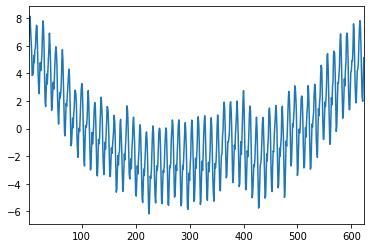

In [334]:
data['detrended'].plot()

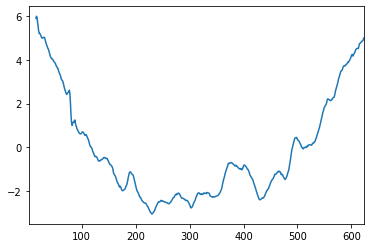

In [335]:
data['detrended'].rolling(12).mean().plot()

In [336]:
monthly_pattern = data.groupby('month')['detrended'].mean()

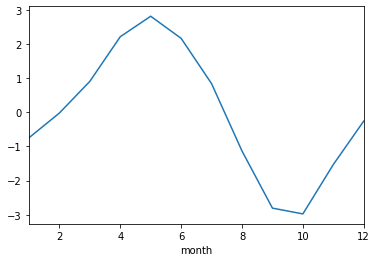

In [337]:
monthly_pattern.plot()

$$co2 = trend + monthly\ pattern (sesonality)$$

## See Results on Training Set

In [338]:
data.head()

,date,co2,year,month,yearly_trend,detrended
2,1958.2027,315.70,1958,3,309.369033,6.330967
3,1958.2877,317.45,1958,4,309.369033,8.080967
4,1958.3699,317.51,1958,5,309.369033,8.140967
6,1958.5370,315.86,1958,7,309.369033,6.490967
7,1958.6219,314.93,1958,8,309.369033,5.560967


In [339]:
def get_pattern(x):
    return monthly_pattern[x]

In [340]:
data['month'].apply(get_pattern)

2      0.910632
3      2.221809
4      2.823018
6      0.844172
7     -1.133713
         ...   
619   -1.133713
620   -2.810443
621   -2.980667
622   -1.530636
623   -0.254290
Name: month, Length: 617, dtype: float64

In [341]:
monthly_pattern[11]

-1.5306356837609945

In [342]:
monthly_pattern.to_dict()

{1: -0.7465494654565465,
 2: -0.01857460846004756,
 3: 0.9106320933276393,
 4: 2.2218085639158756,
 5: 2.823018162392855,
 6: 2.1742348482689433,
 7: 0.8441720085466969,
 8: -1.1337126068379177,
 9: -2.8104433760686924,
 10: -2.9806671125153676,
 11: -1.5306356837609945,
 12: -0.2542895299148448}

In [343]:
data.head()

,date,co2,year,month,yearly_trend,detrended
2,1958.2027,315.70,1958,3,309.369033,6.330967
3,1958.2877,317.45,1958,4,309.369033,8.080967
4,1958.3699,317.51,1958,5,309.369033,8.140967
6,1958.5370,315.86,1958,7,309.369033,6.490967
7,1958.6219,314.93,1958,8,309.369033,5.560967


In [344]:
data['co2_pred'] = (data['year'] * yearly_coef + yearly_intercept) + data['month'].apply(lambda x: monthly_pattern[x])
# data['co2_pred'] = yearly_model.predict(data[['year']]) + data['month'].apply(lambda x: monthly_pattern[x])

In [345]:
data.head()

,date,co2,year,month,yearly_trend,detrended,co2_pred
2,1958.2027,315.70,1958,3,309.369033,6.330967,310.279665
3,1958.2877,317.45,1958,4,309.369033,8.080967,311.590841
4,1958.3699,317.51,1958,5,309.369033,8.140967,312.192051
6,1958.5370,315.86,1958,7,309.369033,6.490967,310.213205
7,1958.6219,314.93,1958,8,309.369033,5.560967,308.235320


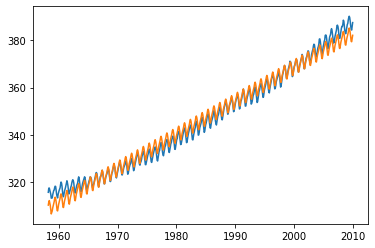

In [346]:
plt.plot(data['date'], data['co2'])
plt.plot(data['date'], data['co2_pred'])

In [347]:
((data['co2'] - data['co2_pred'])**2).mean()

6.1478218316028315

In [348]:
from sklearn.metrics import r2_score

In [349]:
r2_score(data['co2'], data['co2_pred'])

0.9868258269256432

## Polynomial Trend?

In [350]:
yearly_trend[['year']].assign(year_sq=lambda df: df['year']**2).head()

,year,year_sq
0,1958,3833764
1,1959,3837681
2,1960,3841600
3,1961,3845521
4,1962,3849444


In [351]:
yearly_model.fit(
    X=yearly_trend[['year']].assign(year_sq=lambda df: df['year']**2),
    y=yearly_trend['yearly_co2']
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
yearly_coef, yearly_coef_sq = yearly_model.coef_

In [353]:
yearly_intercept = yearly_model.intercept_

In [354]:
data['yearly_trend'] = data['year'] * yearly_coef + data['year']**2 * yearly_coef_sq + yearly_intercept

In [355]:
data['detrended'] = data['co2'] - data['yearly_trend']

In [356]:
monthly_pattern = data.groupby('month')['detrended'].mean()

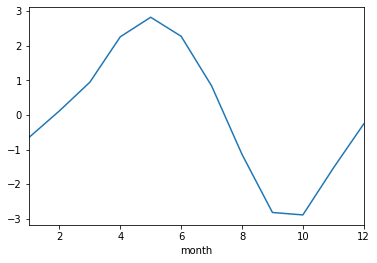

In [357]:
monthly_pattern.plot()

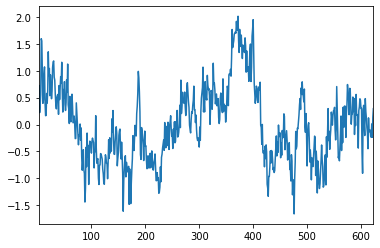

In [360]:
(data['co2'] - data['yearly_trend'] - data['month'].apply(lambda x: monthly_pattern[x]) ).plot()

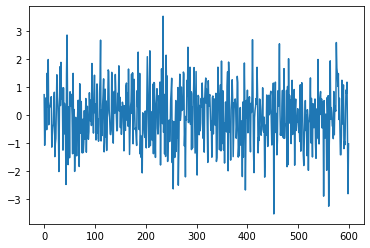

In [362]:
plt.plot(np.random.randn(600))

## Re-calculate Results for polynomial trend

In [220]:
data['co2_pred'] = \
    data['year'] * yearly_coef \
    + data['year']**2 * yearly_coef_sq \
    + yearly_intercept \
    + data['month'].apply(lambda x: monthly_pattern[x])

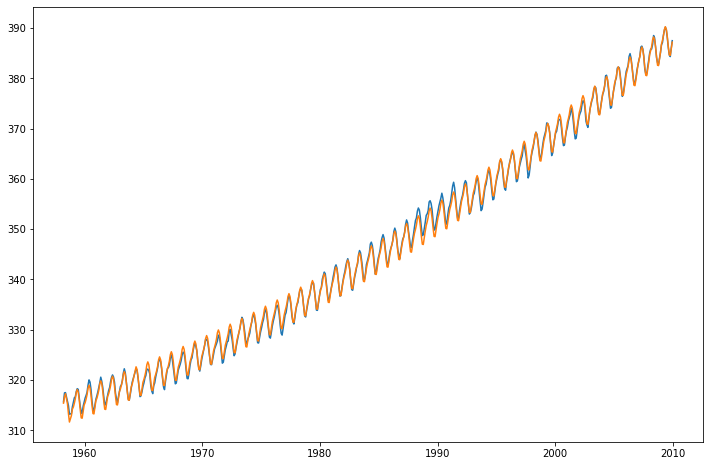

In [221]:
plt.figure(figsize=(12, 8))
plt.plot(data['date'], data['co2'])
plt.plot(data['date'], data['co2_pred'])

## Forecasting between 2010-2020

### Creating dates

In [224]:
years = pd.DataFrame({'year': range(2010, 2021)})
months = pd.DataFrame({'month': range(1, 13)})
forecast_table = years.assign(k=1).merge(months.assign(k=1)).drop('k', 1)  # cross-join

In [227]:
forecast_table.head(12)

,year,month
0,2010,1
1,2010,2
2,2010,3
3,2010,4
4,2010,5
5,2010,6
6,2010,7
7,2010,8
8,2010,9
9,2010,10


In [228]:
forecast_table['co2_pred'] = \
    forecast_table['year'] * yearly_coef \
    + forecast_table['year']**2 * yearly_coef_sq \
    + yearly_intercept \
    + forecast_table['month'].apply(lambda x: monthly_pattern[x])

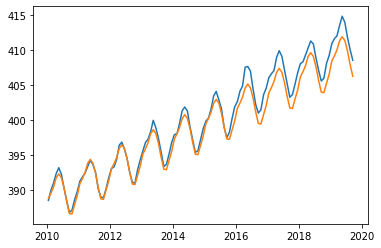

In [231]:
plt.plot(testDates[:-15], testCo2[:-15])
plt.plot(testDates[:-15], forecast_table['co2_pred'][:-15])

In [234]:
r2_score(testCo2[:-15], forecast_table['co2_pred'][:-15])

0.9628799300815548

In [235]:
((testCo2[:-15] - forecast_table['co2_pred'][:-15])**2).mean()

1.9103834991625406

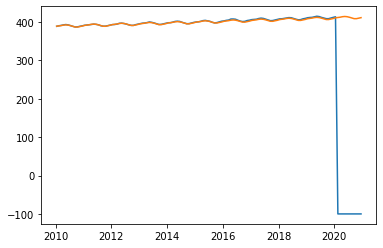

In [230]:
plt.plot(testDates, testCo2)
plt.plot(testDates, forecast_table['co2_pred'])

In [33]:
data['year'] = np.floor(data['date']).astype(int)

In [34]:
data['month'] = data.groupby('year')['year'].rank(method='first')

In [87]:
data

,date,co2,month,year
0,1958.0411,-99.99,1.0,1958
1,1958.1260,-99.99,2.0,1958
2,1958.2027,315.70,3.0,1958
3,1958.2877,317.45,4.0,1958
4,1958.3699,317.51,5.0,1958
...,...,...,...,...
619,2009.6219,386.08,8.0,2009
620,2009.7068,384.65,9.0,2009
621,2009.7890,384.33,10.0,2009
622,2009.8740,386.05,11.0,2009


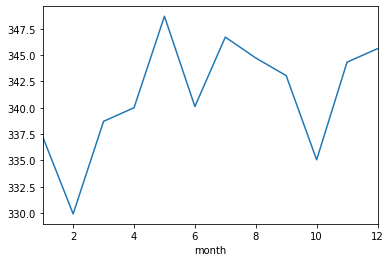

In [38]:
data.groupby('month')['co2'].mean().plot()

In [20]:
np.floor(156.45)

156.0

In [59]:
yearly_trend = data.groupby('year')['co2'].mean().rename('yearly_co2').reset_index()

In [61]:
yearly_trend.head()

,year,yearly_co2
0,1958,176.891667
1,1959,315.981667
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167


In [62]:
data_processed =\
data.merge(yearly_trend)

In [68]:
yearly_trend['year'] * 0.44

0     861.52
1     861.96
2     862.40
3     862.84
4     863.28
5     863.72
6     864.16
7     864.60
8     865.04
9     865.48
10    865.92
11    866.36
12    866.80
13    867.24
14    867.68
15    868.12
16    868.56
17    869.00
18    869.44
19    869.88
20    870.32
21    870.76
22    871.20
23    871.64
24    872.08
25    872.52
26    872.96
27    873.40
28    873.84
29    874.28
30    874.72
31    875.16
32    875.60
33    876.04
34    876.48
35    876.92
36    877.36
37    877.80
38    878.24
39    878.68
40    879.12
41    879.56
42    880.00
43    880.44
44    880.88
45    881.32
46    881.76
47    882.20
48    882.64
49    883.08
50    883.52
51    883.96
Name: year, dtype: float64

In [77]:
yearly_model=LinearRegression().fit(yearly_trend[['year']], yearly_trend['yearly_co2'])

In [78]:
yearly_model.intercept_

-3441.1689707305254

In [79]:
yearly_model.coef_

array([1.90690796])

In [86]:
-3441.1689707305254 + 1.90690796 * 2020

410.78510846947484

In [74]:
yearly_trend

,year,yearly_co2
0,1958,176.891667
1,1959,315.981667
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
5,1963,318.992500
6,1964,214.404167
7,1965,320.036667
8,1966,321.369167
9,1967,322.180833


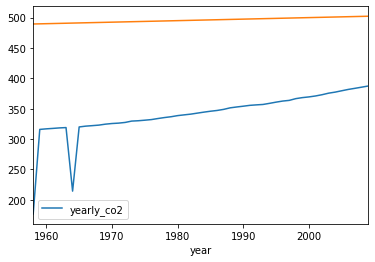

In [73]:
yearly_trend.plot(x='year', y='yearly_co2')
plt.plot(yearly_trend['year'], yearly_trend['year']*0.25)

In [64]:
data_processed.head()

,date,co2,month,year,yearly_co2
0,1958.0411,-99.99,1.0,1958,176.891667
1,1958.1260,-99.99,2.0,1958,176.891667
2,1958.2027,315.70,3.0,1958,176.891667
3,1958.2877,317.45,4.0,1958,176.891667
4,1958.3699,317.51,5.0,1958,176.891667


In [65]:
data_processed['detrended'] = data_processed['co2'] - data_processed['yearly_co2']

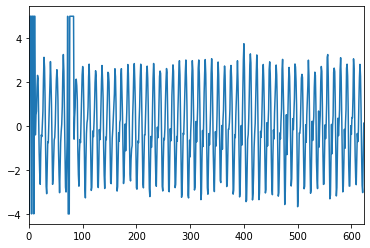

In [66]:
data_processed['detrended'].clip(-4, 5).plot()

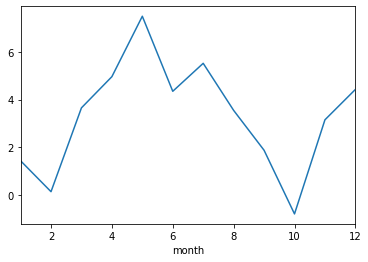

In [85]:
data_processed[data_processed['co2']>0].groupby('month')['detrended'].mean().plot()

In [94]:
data['co2'].shift(1)

0         NaN
1      -99.99
2      -99.99
3      315.70
4      317.45
        ...  
619    388.07
620    386.08
621    384.65
622    384.33
623    386.05
Name: co2, Length: 624, dtype: float64

In [96]:
data['co2'].shift(2)

0         NaN
1         NaN
2      -99.99
3      -99.99
4      315.70
        ...  
619    389.62
620    388.07
621    386.08
622    384.65
623    384.33
Name: co2, Length: 624, dtype: float64

In [232]:
data

,date,co2,year,month,yearly_trend,detrended,co2_pred
2,1958.2027,315.70,1958,3,314.466673,1.233327,315.413759
3,1958.2877,317.45,1958,4,314.466673,2.983327,316.724935
4,1958.3699,317.51,1958,5,314.466673,3.043327,317.289691
6,1958.5370,315.86,1958,7,314.466673,1.393327,315.310845
7,1958.6219,314.93,1958,8,314.466673,0.463327,313.332960
...,...,...,...,...,...,...,...
619,2009.6219,386.08,2009,8,387.449878,-1.369878,386.316166
620,2009.7068,384.65,2009,9,387.449878,-2.799878,384.639435
621,2009.7890,384.33,2009,10,387.449878,-3.119878,384.569165
622,2009.8740,386.05,2009,11,387.449878,-1.399878,385.919243


In [236]:
data = pd.DataFrame({'date': trainDates, 'co2': trainCo2})

In [238]:
data = data[data['co2'] > 0]

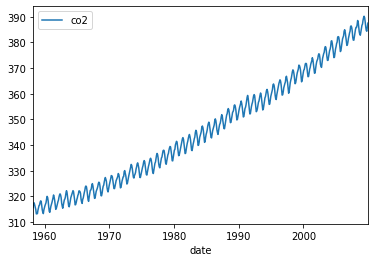

In [240]:
data.plot(x='date', y='co2')

In [241]:
data = data.sort_values(by='date')

In [242]:
data.head()

,date,co2
2,1958.2027,315.70
3,1958.2877,317.45
4,1958.3699,317.51
6,1958.5370,315.86
7,1958.6219,314.93


$$y(t) = b_1 y(t-1) + b_2 y(t-2) + b_3 y(t-3) + ... + b_n y(t - n)$$

In [292]:
data_shifted = data.copy()
n = 12

for lag in range(1, n+1):
    data_shifted[f'y_{lag}'] = data['co2'].shift(lag)

In [293]:
data_shifted.head(20)

,date,co2,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
2,1958.2027,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1958.2877,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1958.3699,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1958.5370,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1958.6219,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958.7068,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1958.8740,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN
11,1958.9562,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN
12,1959.0411,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN
13,1959.1260,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN


In [294]:
data_shifted = data_shifted.iloc[n:, :]
data_shifted

,date,co2,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
16,1959.3699,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70
17,1959.4548,318.15,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45
18,1959.5370,316.54,318.15,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51
19,1959.6219,314.80,316.54,318.15,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86
20,1959.7068,313.84,314.80,316.54,318.15,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2009.6219,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,385.11,384.01,382.78,383.09,384.08
620,2009.7068,384.65,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,385.11,384.01,382.78,383.09
621,2009.7890,384.33,384.65,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,385.11,384.01,382.78
622,2009.8740,386.05,384.33,384.65,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,385.11,384.01


In [295]:
X = data_shifted.iloc[:, 2:]
y = data_shifted['co2']

In [296]:
ar_model = LinearRegression()

In [297]:
ar_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

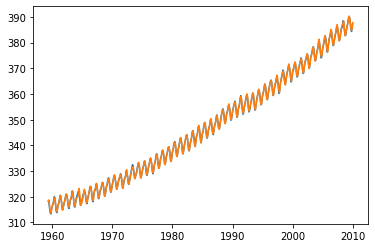

In [298]:
plt.plot(data_shifted['date'], y)
plt.plot(data_shifted['date'], ar_model.predict(X))

In [299]:
len(testCo2)

132

In [300]:
start = y.values[-n:].tolist()

In [301]:
ar_model.predict([start[-n:]])[0]

386.9965111909783

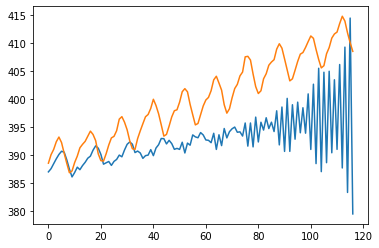

In [307]:
start = y.values[-n:].tolist()

for i in range(132):
    new_y = ar_model.predict([start[-n:]])[0]
    start.append(new_y)

plt.plot(start[n:][:-15])
plt.plot(testCo2[:-15])

In [308]:
data_shifted = data.copy()
n = 24

for lag in range(1, n+1):
    data_shifted[f'y_{lag}'] = data['co2'].shift(lag)

In [309]:
data_shifted.head(20)

,date,co2,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,...,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24
2,1958.2027,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1958.2877,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1958.3699,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1958.5370,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1958.6219,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958.7068,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1958.8740,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1958.9562,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1959.0411,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1959.1260,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
data_shifted = data_shifted.iloc[n:, :]
data_shifted

,date,co2,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,...,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24
28,1960.3716,320.04,319.03,317.58,316.98,316.43,315.58,314.81,313.33,313.84,...,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45,315.70
29,1960.4563,319.59,320.04,319.03,317.58,316.98,316.43,315.58,314.81,313.33,...,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51,317.45
30,1960.5383,318.18,319.59,320.04,319.03,317.58,316.98,316.43,315.58,314.81,...,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86,317.51
31,1960.6230,315.90,318.18,319.59,320.04,319.03,317.58,316.98,316.43,315.58,...,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93,315.86
32,1960.7077,314.17,315.90,318.18,319.59,320.04,319.03,317.58,316.98,316.43,...,318.15,318.29,317.72,316.65,316.49,315.58,314.67,313.33,313.21,314.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2009.6219,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,385.11,...,388.51,386.77,385.83,385.84,385.07,383.61,382.36,380.86,380.86,381.84
620,2009.7068,384.65,386.08,388.07,389.62,390.17,389.57,388.52,387.12,386.65,...,388.05,388.51,386.77,385.83,385.84,385.07,383.61,382.36,380.86,380.86
621,2009.7890,384.33,384.65,386.08,388.07,389.62,390.17,389.57,388.52,387.12,...,386.25,388.05,388.51,386.77,385.83,385.84,385.07,383.61,382.36,380.86
622,2009.8740,386.05,384.33,384.65,386.08,388.07,389.62,390.17,389.57,388.52,...,384.08,386.25,388.05,388.51,386.77,385.83,385.84,385.07,383.61,382.36


In [311]:
X = data_shifted.iloc[:, 2:]
y = data_shifted['co2']

In [312]:
ar_model = LinearRegression()

In [313]:
ar_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

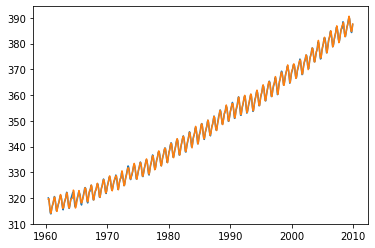

In [314]:
plt.plot(data_shifted['date'], y)
plt.plot(data_shifted['date'], ar_model.predict(X))

In [315]:
len(testCo2)

132

In [316]:
start = y.values[-n:].tolist()

In [317]:
ar_model.predict([start[-n:]])[0]

384.9613974030603

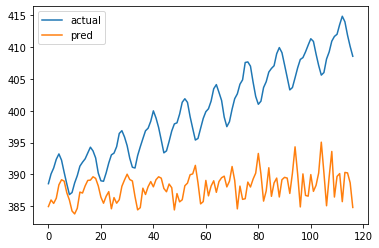

In [320]:
start = y.values[-n:].tolist()

for i in range(132):
    new_y = ar_model.predict([start[-n:]])[0]
    start.append(new_y)

plt.plot(testCo2[:-15], label='actual')
plt.plot(start[n:][:-15], label='pred')
plt.legend()

In [ ]:
auto regression
seasonality
trend